In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
from itertools import combinations

In [2]:
# Define base paths
data_dir = "../../data/loaded"
Images_dir = "../../images/EDA_1"
fire_file_path = os.path.join(data_dir, "fire.csv")

In [3]:
fire_df = pd.read_csv(fire_file_path)

## General Inspection

In [4]:
fire_df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,country
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2,Algeria
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2,Algeria
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2,Algeria
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2,Algeria
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2,Algeria


In [5]:
print("shape:", fire_df.shape)
print("columns:", fire_df.columns.tolist())
print("missing values:\n", fire_df.isnull().sum())

shape: (90250, 16)
columns: ['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_ti5', 'frp', 'daynight', 'type', 'country']
missing values:
 latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
country       0
dtype: int64


In [6]:
for col in fire_df.columns:
    print("unique values in", col, ":", fire_df[col].nunique())

unique values in latitude : 54957
unique values in longitude : 56922
unique values in bright_ti4 : 6189
unique values in scan : 49
unique values in track : 43
unique values in acq_date : 364
unique values in acq_time : 348
unique values in satellite : 1
unique values in instrument : 1
unique values in confidence : 3
unique values in version : 1
unique values in bright_ti5 : 6180
unique values in frp : 2565
unique values in daynight : 2
unique values in type : 3
unique values in country : 2


In [7]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90250 entries, 0 to 90249
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    90250 non-null  float64
 1   longitude   90250 non-null  float64
 2   bright_ti4  90250 non-null  float64
 3   scan        90250 non-null  float64
 4   track       90250 non-null  float64
 5   acq_date    90250 non-null  object 
 6   acq_time    90250 non-null  int64  
 7   satellite   90250 non-null  object 
 8   instrument  90250 non-null  object 
 9   confidence  90250 non-null  object 
 10  version     90250 non-null  int64  
 11  bright_ti5  90250 non-null  float64
 12  frp         90250 non-null  float64
 13  daynight    90250 non-null  object 
 14  type        90250 non-null  int64  
 15  country     90250 non-null  object 
dtypes: float64(7), int64(3), object(6)
memory usage: 11.0+ MB


In [8]:
# check duplicates of langtitude x latitude
duplicates = fire_df.duplicated(subset=['latitude', 'longitude'])
print("Number of duplicate latitude-longitude pairs:", duplicates.sum())

Number of duplicate latitude-longitude pairs: 61


In [9]:
# print duplicate latitude-longitude pairs
duplicate_pairs = fire_df[duplicates][['latitude', 'longitude']]
print(duplicate_pairs)

       latitude  longitude
7728   28.73429    9.15163
15371  27.92529    9.25301
16745  30.47252    7.02669
19399  31.39407    6.93409
21727  30.83574    6.55990
...         ...        ...
85895  31.40736    5.97107
86385  31.40697    5.97686
86998  28.63571    7.53644
87241  31.66263    6.06017
90141  31.64697    9.17066

[61 rows x 2 columns]


In [10]:
# print an example of rows that have same latitude and longitude
print(fire_df[(fire_df['latitude'] == duplicate_pairs.iloc[0]['latitude']) & 
               (fire_df['longitude'] == duplicate_pairs.iloc[0]['longitude'])])
# number of duplicate rows
duplicate_rows = fire_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())


      latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
423   28.73429    9.15163      328.41  0.39   0.36  2024-01-03       106   
7728  28.73429    9.15163      335.36  0.51   0.41  2024-02-08      1247   

     satellite instrument confidence  version  bright_ti5   frp daynight  \
423        N20      VIIRS          n        2      276.70  2.14        N   
7728       N20      VIIRS          n        2      305.31  1.70        D   

      type  country  
423      2  Algeria  
7728     2  Algeria  
Number of duplicate rows: 0


In [11]:
# check duplicates of langtitude x latitude x acquisition_date x acquisition_time
duplicates_full = fire_df.duplicated(subset=['latitude', 'longitude', 'acq_date', 'acq_time'])
print("Number of duplicate latitude-longitude-date-time entries:", duplicates_full.sum())

Number of duplicate latitude-longitude-date-time entries: 0


In [12]:
# number of duplicate rows
duplicate_rows = fire_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [13]:
# print range of acq_date
fire_df['acq_date'] = pd.to_datetime(fire_df['acq_date'])
print("Date range:", fire_df['acq_date'].min(), "to", fire_df['acq_date'].max())

Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00


In [14]:
num_cols = [ 'bright_ti4', 'bright_ti5', 'scan', 'track', 'frp']
cat_cols = ['confidence','type','daynight']

## Univariate Analysis

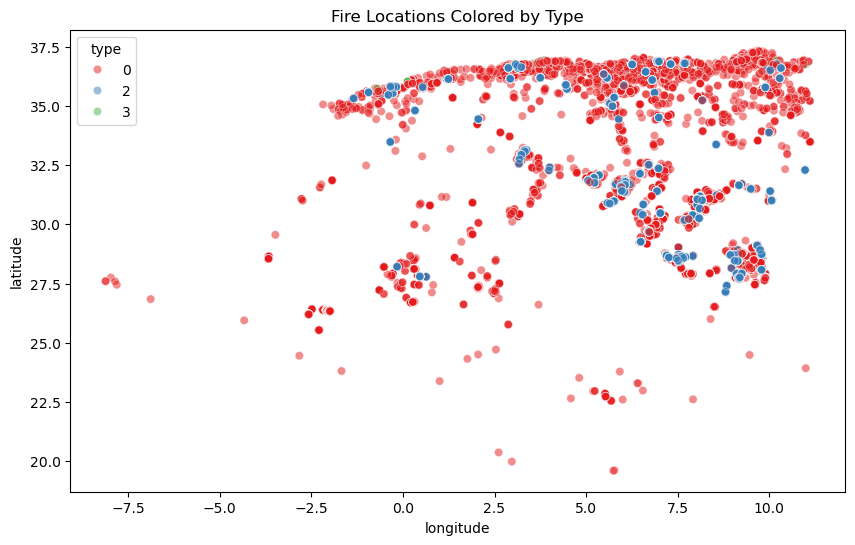

In [17]:
# plot points of fire colored by type use contrasting palette

plt.figure(figsize=(10, 6))
sns.scatterplot(data=fire_df, x='longitude', y='latitude', hue='type', alpha=0.5, palette='Set1')
plt.title('Fire Locations Colored by Type')
plt.savefig(os.path.join(Images_dir, 'fire_locations_by_type.png'))
plt.show()

In [23]:
# =========================
# 🌾 STYLE CONFIGURATION
# =========================
sns.set_theme(
    style="whitegrid",
    font="DejaVu Sans",
    rc={
        "axes.titlesize": 10,
        "axes.labelsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
    }
)

# Define earthy color palette
EARTH_COLORS = {
    "sand": "#F28D5B",    
    "soil": "#CA9384",
    "clay": "#E49C48",
    "carbon": "#DB662C",
    "neutral": "#B5651D"
}

# =========================
# 🌿 UNIVARIATE FUNCTION
# =========================
def plot_univariate_distribution(column, dtype, color_key="sand"):
    """
    Univariate analysis for a soil property column.
    - Detects outliers and prints key stats.
    - Histogram + boxplot (numerical)
    - Clean countplot (categorical)
    - Earth-tone aesthetic for soil-related variables.
    """

    color = EARTH_COLORS.get(color_key, "#C76F57")
    print(f"\n🌱  Univariate analysis for '{column}'\n" + "-"*60)

    # Handle numerical columns
    if dtype == "numerical":
        col_data = fire_df[column].dropna()

        # --- Summary stats ---
        print("📊 Summary statistics:")
        print(col_data.describe())

        # --- Outlier detection ---
        Q1, Q3 = col_data.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = col_data[(col_data < lower) | (col_data > upper)]
        pct_outliers = len(outliers) / len(col_data) * 100

        print(f"\n🚨 Outliers: {len(outliers)} ({pct_outliers:.2f}%)")
        if not outliers.empty:
            print(f"   - Low outliers:  {(outliers < lower).sum()}")
            print(f"   - High outliers: {(outliers > upper).sum()}")

        # --- Plot ---
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
        sns.histplot(col_data, bins='sturges', color=color, kde=True, ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")
        axes[0].set_xlabel(column)
        axes[0].set_ylabel("Frequency")

        sns.boxplot(x=col_data, color=color, ax=axes[1])
        axes[1].set_title(f"Boxplot of {column}")
        axes[1].set_xlabel(column)

        plt.suptitle(f"{column} — Univariate Distribution", fontsize=13, fontweight='bold')
        plt.savefig(os.path.join(Images_dir, f"soil_univariate_{column}.png"), dpi=300, bbox_inches='tight')
        plt.show()

    # Handle categorical columns
    else:
        col_data = fire_df[column].dropna()
        order = col_data.value_counts().index

        plt.figure(figsize=(10, 4))
        sns.countplot(
            data=fire_df,
            x=column,
            order=order,
            hue=column,          # ✅ prevents palette warning
            palette=[color],     # single-tone aesthetic
            legend=False,
            edgecolor='black'
        )
        plt.xticks(rotation=60, ha='right')
        plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"fire_univariate_{column}.png"), dpi=300, bbox_inches='tight')
        plt.show()

        print(f"🏷️ Mode of '{column}': {fire_df[column].mode(dropna=True).iloc[0]}")


In [20]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")


🌱  Univariate analysis for 'confidence'
------------------------------------------------------------


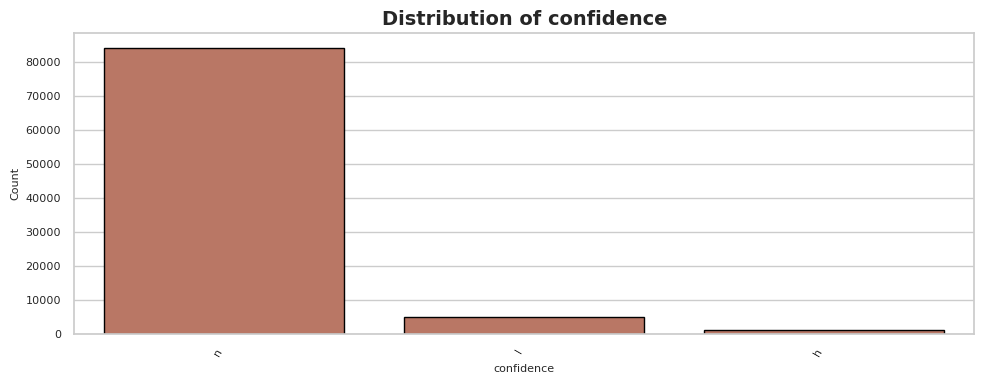

🏷️ Mode of 'confidence': n

🌱  Univariate analysis for 'type'
------------------------------------------------------------


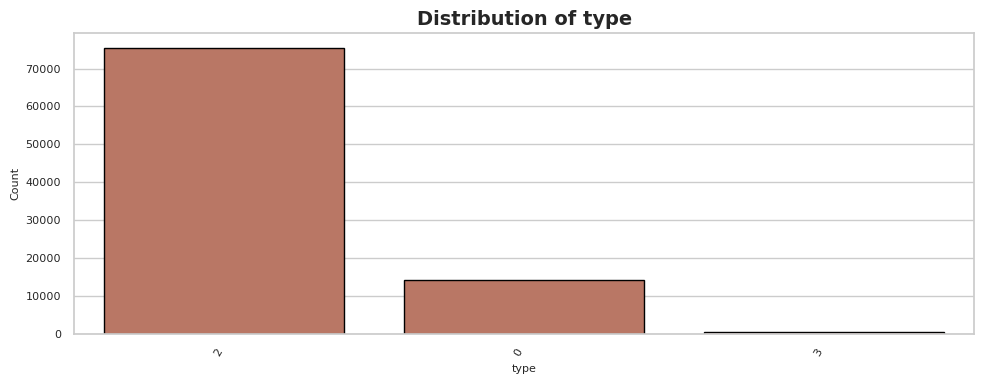

🏷️ Mode of 'type': 2

🌱  Univariate analysis for 'daynight'
------------------------------------------------------------


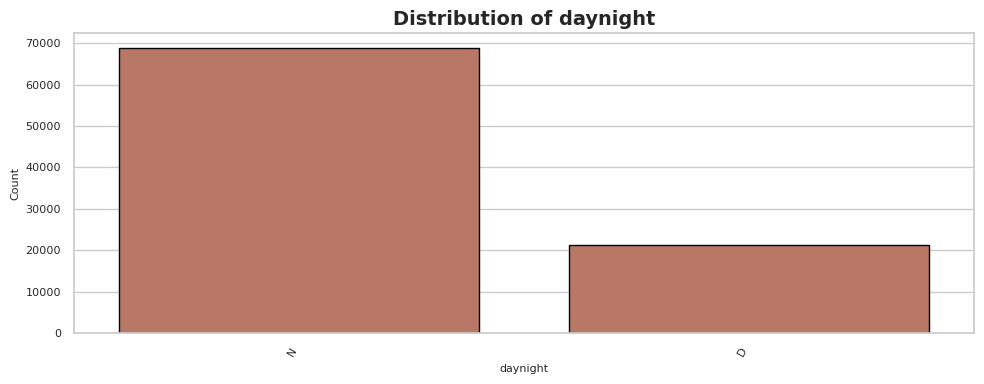

🏷️ Mode of 'daynight': N

🌱  Univariate analysis for 'bright_ti4'
------------------------------------------------------------
📊 Summary statistics:
count    90250.000000
mean       321.091793
std         18.205551
min        240.170000
25%        305.380000
50%        316.710000
75%        337.400000
max        367.000000
Name: bright_ti4, dtype: float64

🚨 Outliers: 1 (0.00%)
   - Low outliers:  1
   - High outliers: 0


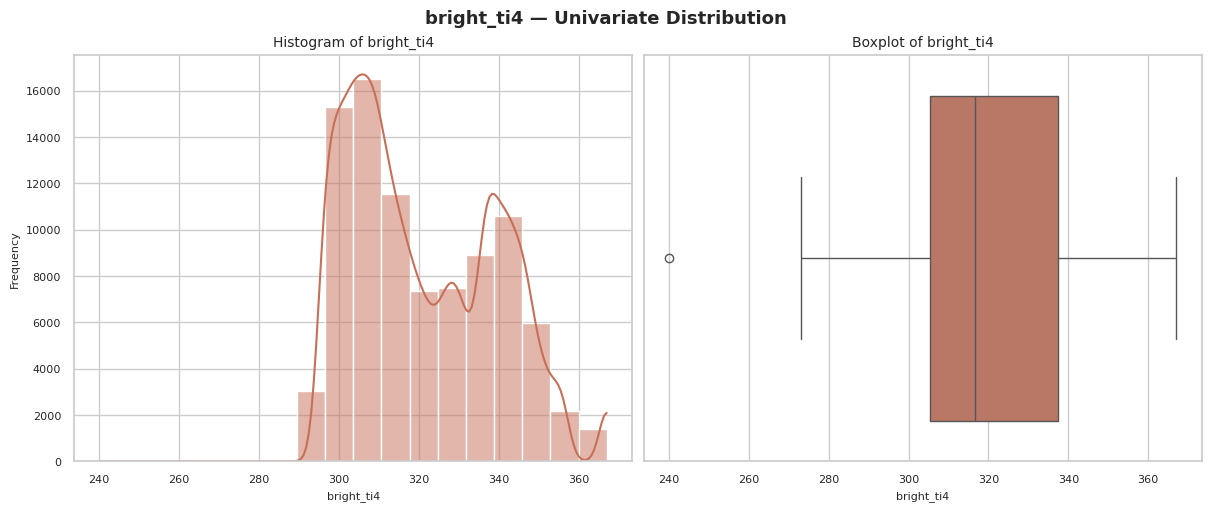


🌱  Univariate analysis for 'bright_ti5'
------------------------------------------------------------
📊 Summary statistics:
count    90250.000000
mean       291.726092
std         11.700269
min        244.790000
25%        282.900000
50%        290.790000
75%        298.100000
max        355.420000
Name: bright_ti5, dtype: float64

🚨 Outliers: 994 (1.10%)
   - Low outliers:  84
   - High outliers: 910


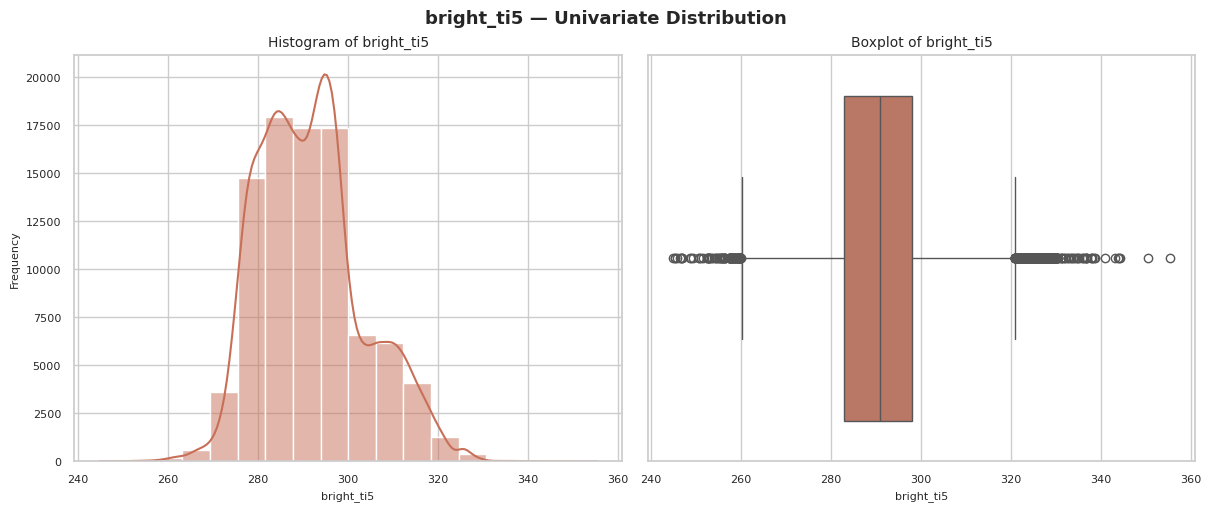


🌱  Univariate analysis for 'scan'
------------------------------------------------------------
📊 Summary statistics:
count    90250.000000
mean         0.475991
std          0.101596
min          0.320000
25%          0.400000
50%          0.450000
75%          0.540000
max          0.800000
Name: scan, dtype: float64

🚨 Outliers: 1496 (1.66%)
   - Low outliers:  0
   - High outliers: 1496


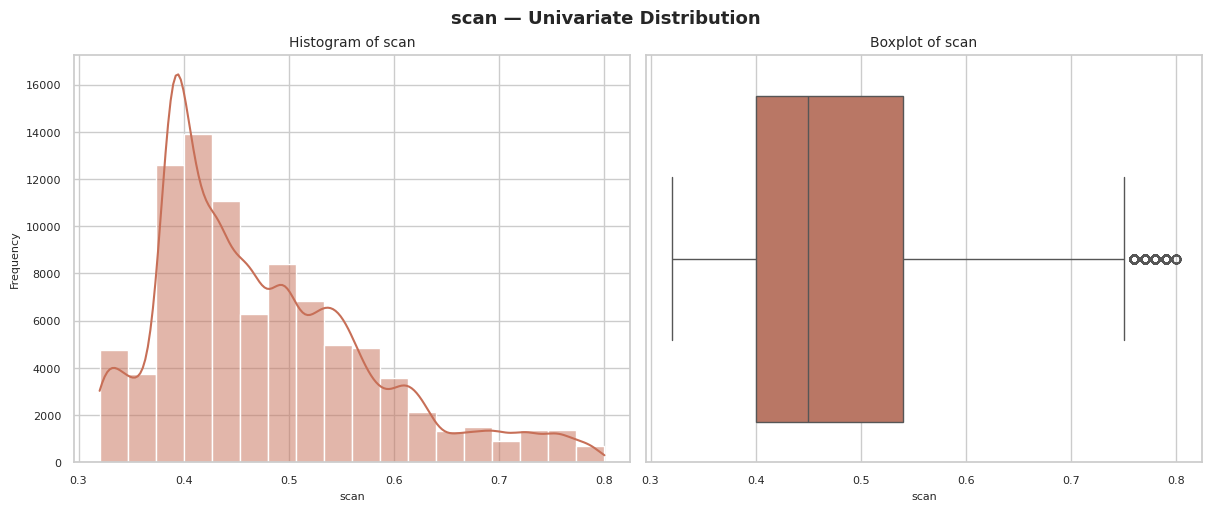


🌱  Univariate analysis for 'track'
------------------------------------------------------------
📊 Summary statistics:
count    90250.000000
mean         0.515446
std          0.126508
min          0.360000
25%          0.390000
50%          0.490000
75%          0.620000
max          0.780000
Name: track, dtype: float64

🚨 Outliers: 0 (0.00%)


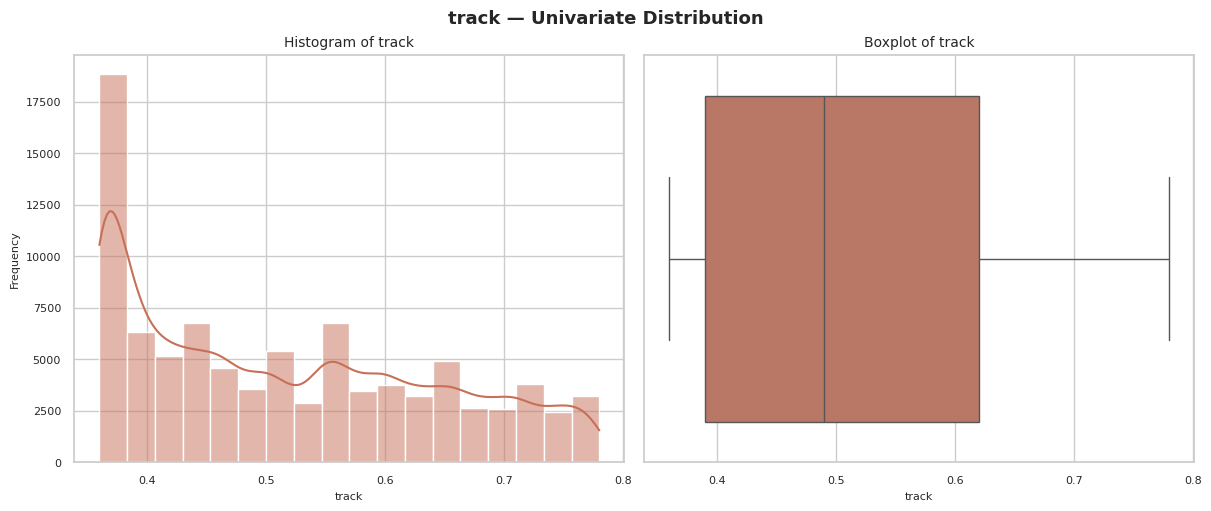


🌱  Univariate analysis for 'frp'
------------------------------------------------------------
📊 Summary statistics:
count    90250.000000
mean         3.447776
std          5.222111
min          0.060000
25%          1.150000
50%          2.060000
75%          3.920000
max        251.890000
Name: frp, dtype: float64

🚨 Outliers: 7210 (7.99%)
   - Low outliers:  0
   - High outliers: 7210


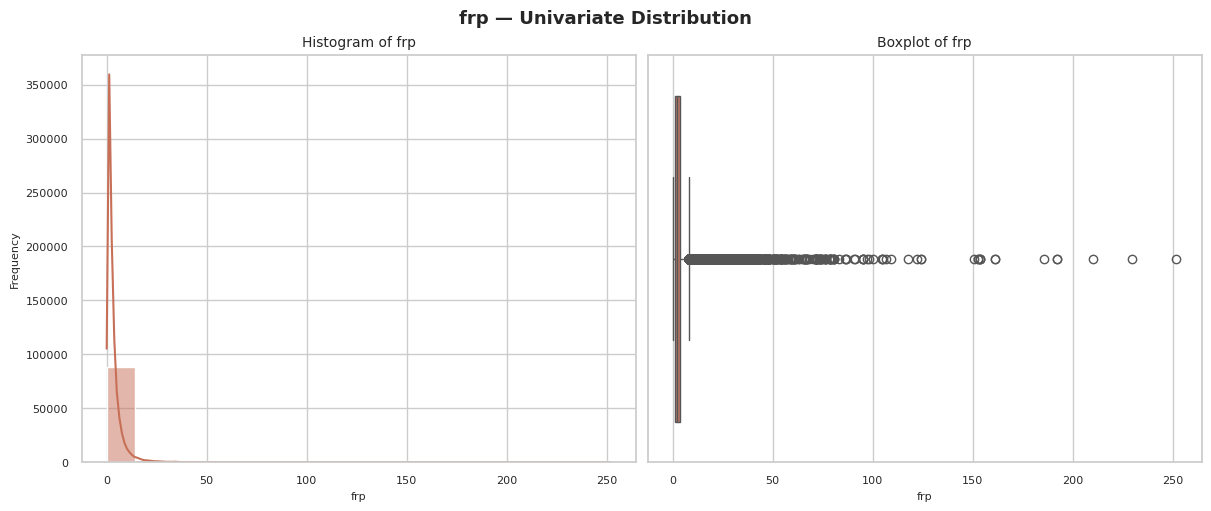

In [24]:
fire_colors = ["#e3863e", "#9c4a2d", "#8b392b", "#ca6e31", "#b5651d", "#855142"]

# Categorical columns
for i, col in enumerate(cat_cols):
    plot_univariate_distribution(col, "categorical", color_key=fire_colors[i % len(fire_colors)])

# Numerical columns
for i, col in enumerate(num_cols):
    plot_univariate_distribution(col, "numerical", color_key=fire_colors[i % len(fire_colors)])

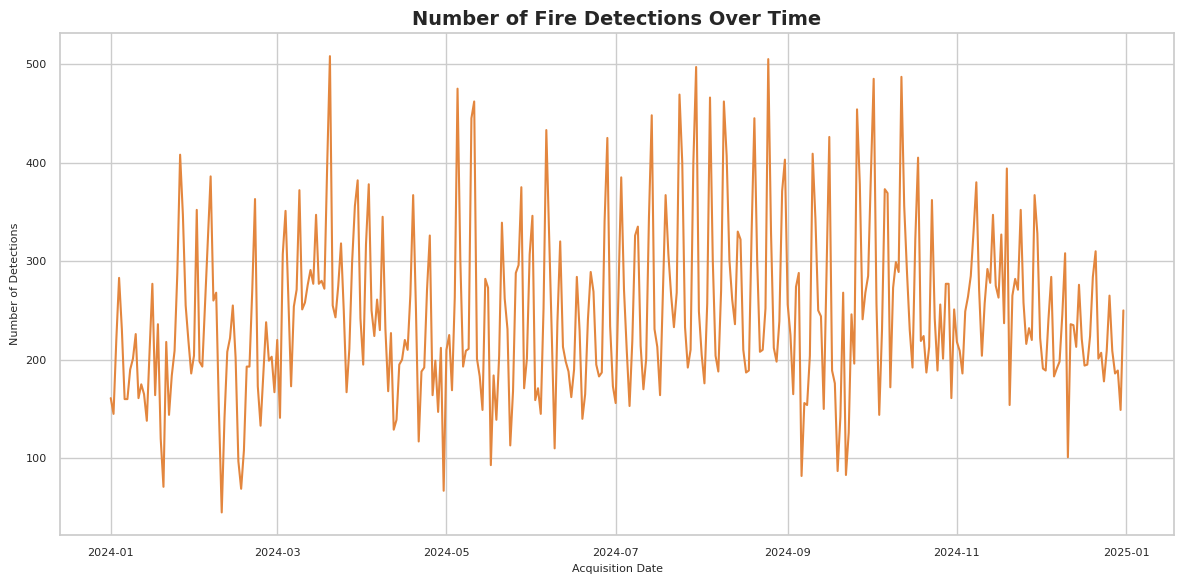

In [25]:
# plot number of rows per acquisition date
plt.figure(figsize=(12, 6))
plt.plot(fire_df['acq_date'].value_counts().sort_index().index,
         fire_df['acq_date'].value_counts().sort_index().values,
         color="#e3863e")
plt.title("Number of Fire Detections Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Acquisition Date")
plt.ylabel("Number of Detections")
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, f"fire_detections_over_time.png"), dpi=300, bbox_inches='tight')
plt.show()

In [27]:
fire_colors = ["#ef7e27", "#e6835f", "#d3634f", "#ff8737", "#f38d34", "#B5310C"]

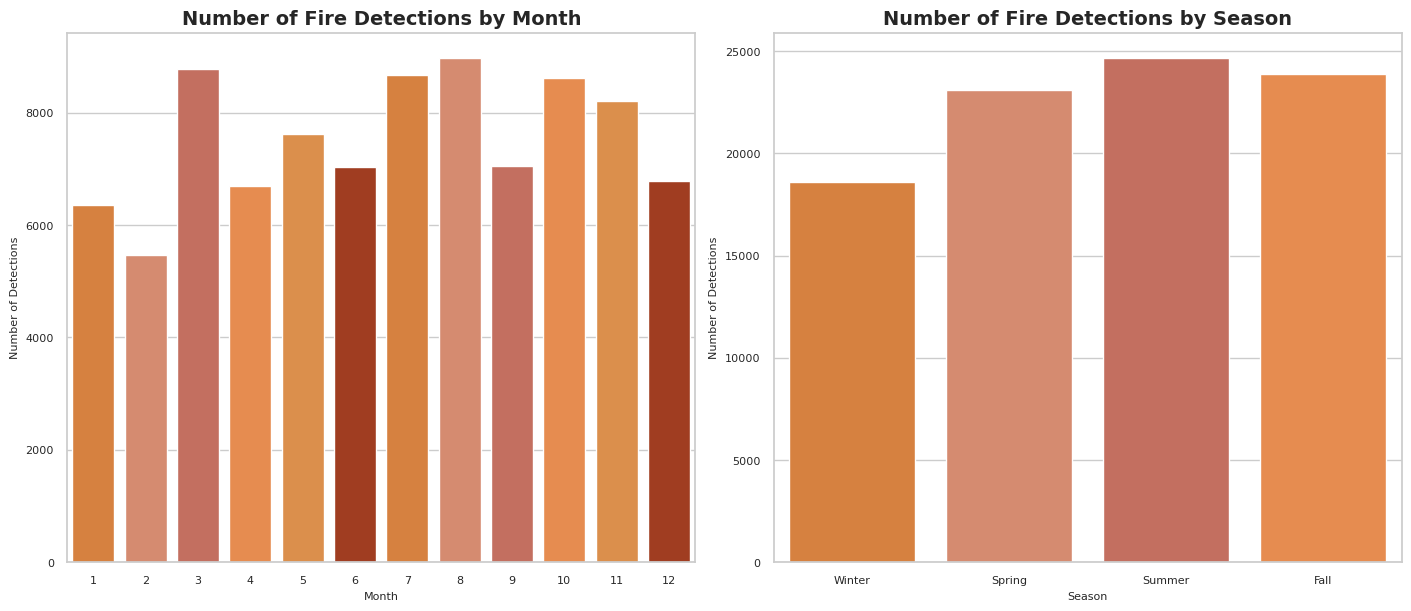

In [28]:
# plot number of rows per month and by season (subplot)
fire_df['month'] = fire_df['acq_date'].dt.month
fire_df['season'] = fire_df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
sns.countplot(data=fire_df, x='month', palette=fire_colors, ax=axes[0])
axes[0].set_title("Number of Fire Detections by Month", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Number of Detections")
sns.countplot(data=fire_df, x='season', order=['Winter', 'Spring', 'Summer', 'Fall'], palette=fire_colors, ax=axes[1])
axes[1].set_title("Number of Fire Detections by Season", fontsize=14
, fontweight='bold')
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Number of Detections")
plt.savefig(os.path.join(Images_dir, f"fire_detections_by_month_season.png"), dpi=300, bbox_inches='tight')
plt.show()

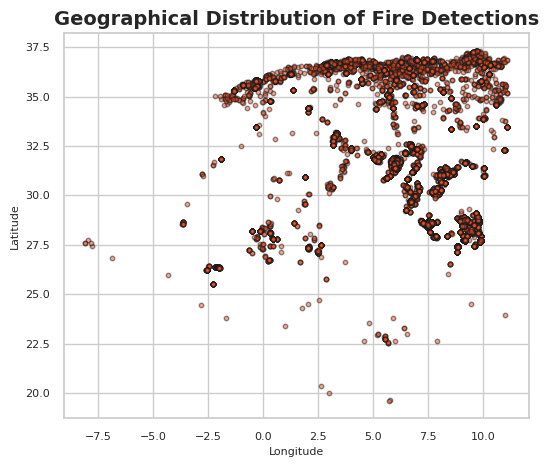

In [31]:
# map of fire points
plt.figure(figsize=(6, 5))
plt.scatter(fire_df['longitude'], fire_df['latitude'], c="#ef5227", alpha=0.5, s=10, edgecolor='k')
plt.title("Geographical Distribution of Fire Detections", fontsize=14, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(os.path.join(Images_dir, f"fire_geographical_distribution.png"), dpi=300, bbox_inches='tight')
plt.show()

## Bivariate Analysis

In [36]:
def bivariate_analysis(df, col1, col2, type1, type2, max_points=5000):
    """
    Perform bivariate analysis depending on variable types.
    type1 and type2 ∈ {"numerical", "categorical"}.
    
    - numerical–numerical → scatter plot + Q–Q plot + correlations
    - numerical–categorical → boxplot + t-test if applicable
    - categorical–categorical → Chi-square test
    """

    data = df[[col1, col2]].dropna()
    # if len(data) > max_points:
    #     data = data.sample(max_points, random_state=42)

    print(f"\n🌿 Bivariate analysis: {col1} ({type1}) vs {col2} ({type2})")
    print("------------------------------------------------------------")

    # === 1️⃣ NUM–NUM ===
    if type1 == "numerical" and type2 == "numerical":
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Scatter plot
        sns.scatterplot(data=data, x=col1, y=col2, alpha=0.6, ax=axes[0], color="#e3863e")
        axes[0].set_title(f"Scatter Plot: {col1} vs {col2}")

        # Q–Q plot (normality check for col1)
        stats.probplot(data[col1].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f"Q–Q Plot of {col1}")

        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"fire_{col1}_{col2}_scatter_qq_plots.png"), dpi=300, bbox_inches='tight')
        plt.show()

        # Correlation
        pearson_corr, _ = stats.pearsonr(data[col1], data[col2])
        spearman_corr, _ = stats.spearmanr(data[col1], data[col2])
        print(f"📈 Pearson correlation: {pearson_corr:.3f}")
        print(f"📊 Spearman correlation: {spearman_corr:.3f}")

    # === 2️⃣ NUM–CAT ===
    elif (type1 == "numerical" and type2 == "categorical") or (type1 == "categorical" and type2 == "numerical"):
        num_col = col1 if type1 == "numerical" else col2
        cat_col = col2 if type2 == "categorical" else col1

        fig, ax = plt.subplots(figsize=(8, 5))
        sns.boxplot(data=data, x=cat_col, y=num_col, ax=ax, palette=fire_colors)
        ax.set_title(f"Boxplot: {num_col} by {cat_col}")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"fire_{num_col}_by_{cat_col}_boxplot.png"), dpi=300, bbox_inches='tight')
        plt.show()

        # T-test (only for 2 categories)
        unique_vals = data[cat_col].unique()
        if len(unique_vals) == 2:
            group1 = data[data[cat_col] == unique_vals[0]][num_col]
            group2 = data[data[cat_col] == unique_vals[1]][num_col]
            t_stat, p_value = stats.ttest_ind(group1, group2)
            print(f"🧪 T-test ({unique_vals[0]} vs {unique_vals[1]}): t = {t_stat:.3f}, p = {p_value:.4f}")
        else:
            print("⚠️ More than 2 categories — skipping t-test.")

    # === 3️⃣ CAT–CAT ===
    elif type1 == "categorical" and type2 == "categorical":
        contingency = pd.crosstab(data[col1], data[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency)
        print(f"🧩 Chi-square test: χ² = {chi2:.3f}, p = {p:.4f}, dof = {dof}")
        print("Contingency table:\n", contingency)

    print("------------------------------------------------------------")



🌿 Bivariate analysis: confidence (categorical) vs type (categorical)
------------------------------------------------------------
🧩 Chi-square test: χ² = 512.575, p = 0.0000, dof = 4
Contingency table:
 type            0      2    3
confidence                   
h             282    819    8
l            1292   3719    2
n           12642  70957  529
------------------------------------------------------------

🌿 Bivariate analysis: confidence (categorical) vs daynight (categorical)
------------------------------------------------------------
🧩 Chi-square test: χ² = 17388.918, p = 0.0000, dof = 2
Contingency table:
 daynight        D      N
confidence              
h             398    711
l            5013      0
n           15860  68268
------------------------------------------------------------

🌿 Bivariate analysis: type (categorical) vs daynight (categorical)
------------------------------------------------------------
🧩 Chi-square test: χ² = 2458.526, p = 0.0000, dof = 2
Contin

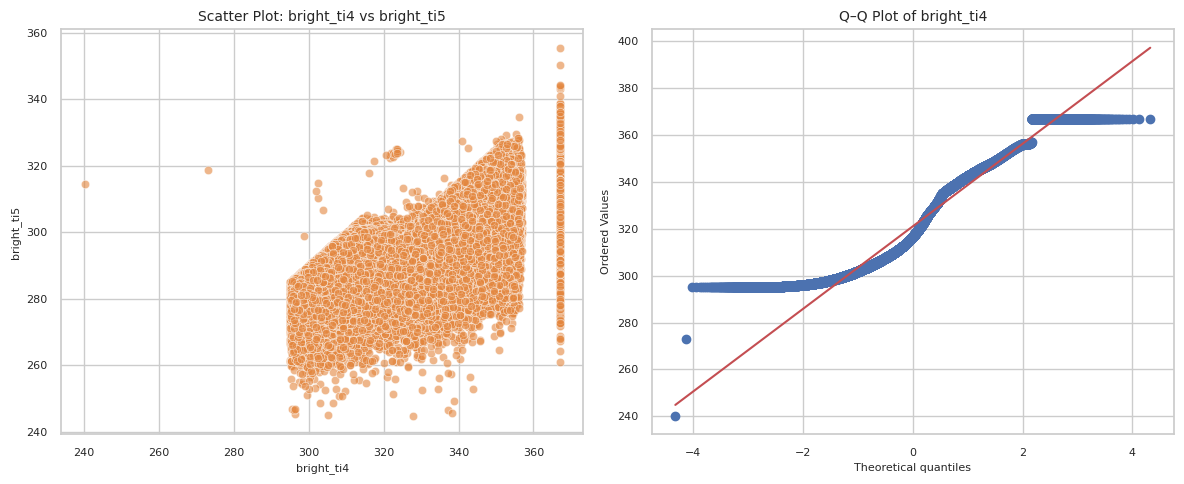

📈 Pearson correlation: 0.669
📊 Spearman correlation: 0.651
------------------------------------------------------------

🌿 Bivariate analysis: bright_ti4 (numerical) vs scan (numerical)
------------------------------------------------------------


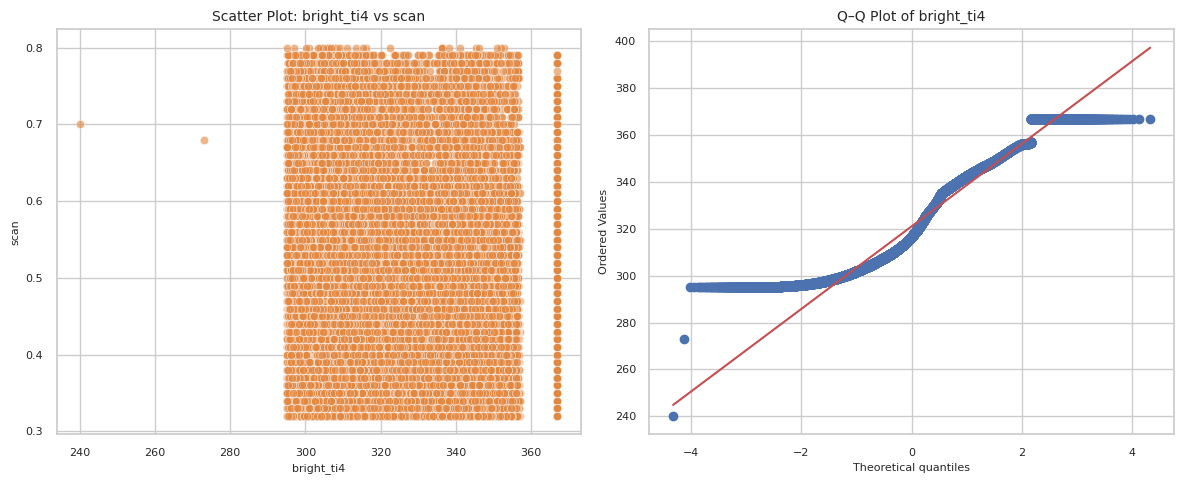

📈 Pearson correlation: -0.045
📊 Spearman correlation: -0.038
------------------------------------------------------------

🌿 Bivariate analysis: bright_ti4 (numerical) vs track (numerical)
------------------------------------------------------------


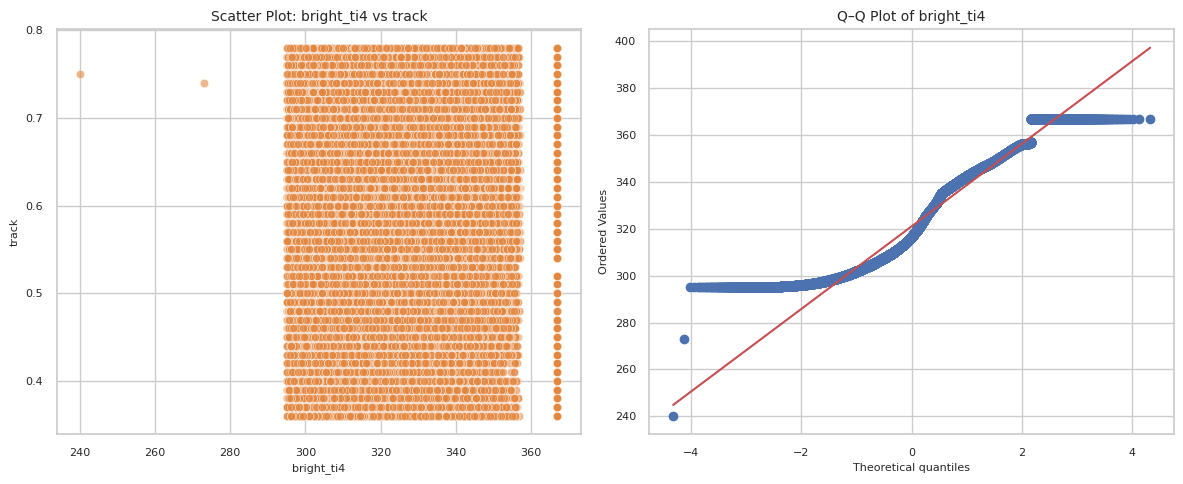

📈 Pearson correlation: 0.004
📊 Spearman correlation: -0.002
------------------------------------------------------------

🌿 Bivariate analysis: bright_ti4 (numerical) vs frp (numerical)
------------------------------------------------------------


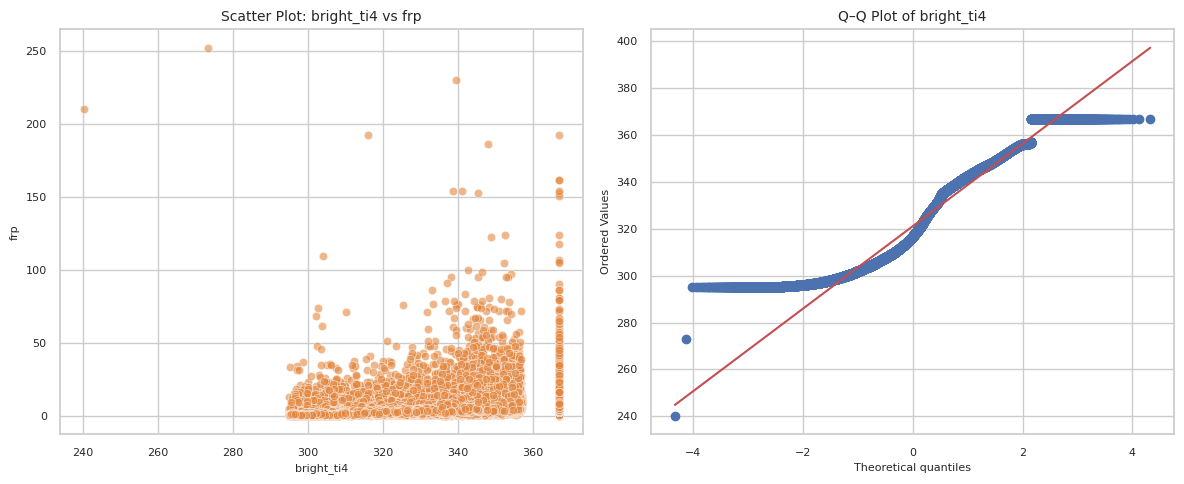

📈 Pearson correlation: 0.444
📊 Spearman correlation: 0.755
------------------------------------------------------------

🌿 Bivariate analysis: bright_ti5 (numerical) vs scan (numerical)
------------------------------------------------------------


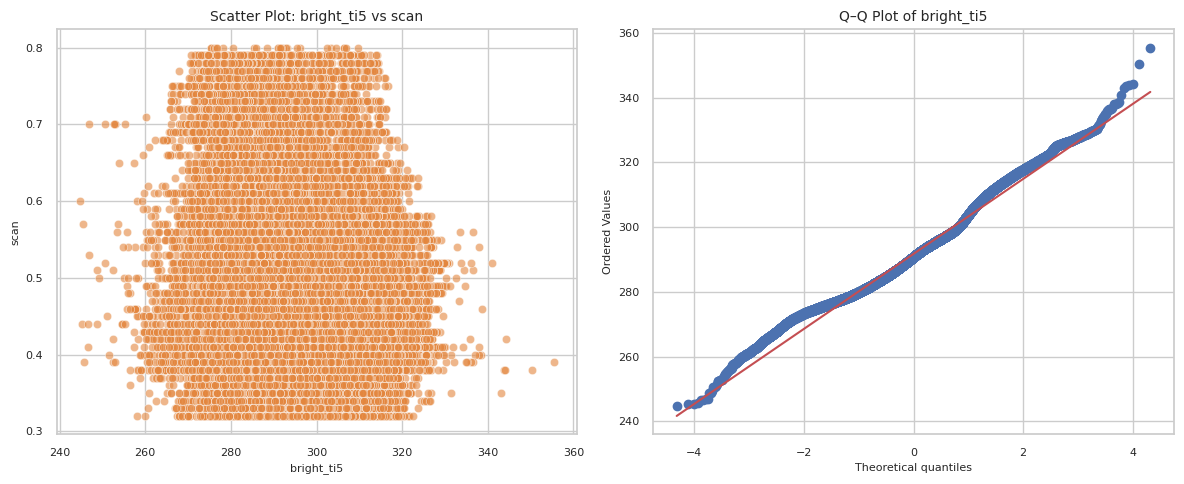

📈 Pearson correlation: -0.059
📊 Spearman correlation: -0.046
------------------------------------------------------------

🌿 Bivariate analysis: bright_ti5 (numerical) vs track (numerical)
------------------------------------------------------------


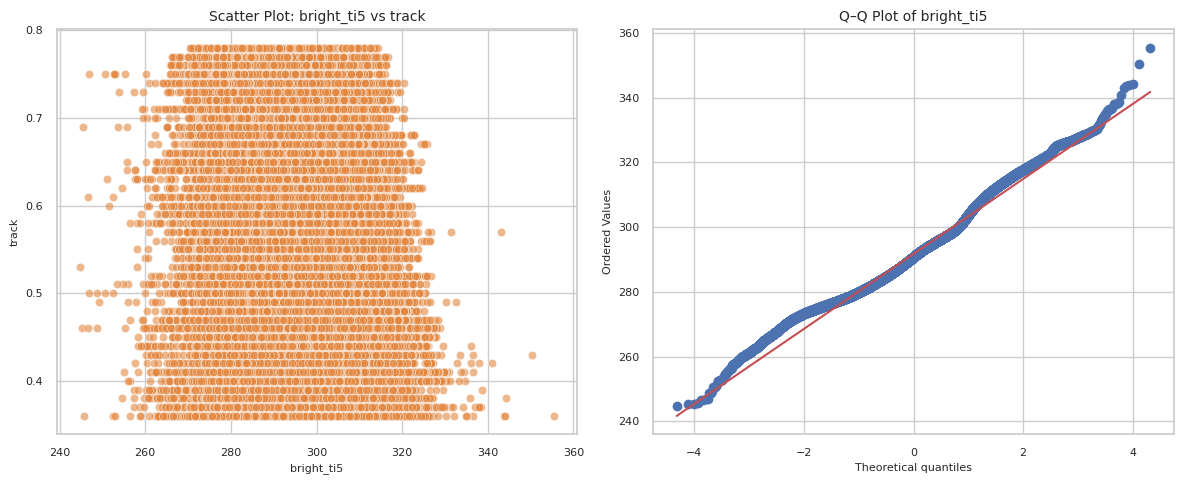

📈 Pearson correlation: -0.079
📊 Spearman correlation: -0.070
------------------------------------------------------------

🌿 Bivariate analysis: bright_ti5 (numerical) vs frp (numerical)
------------------------------------------------------------


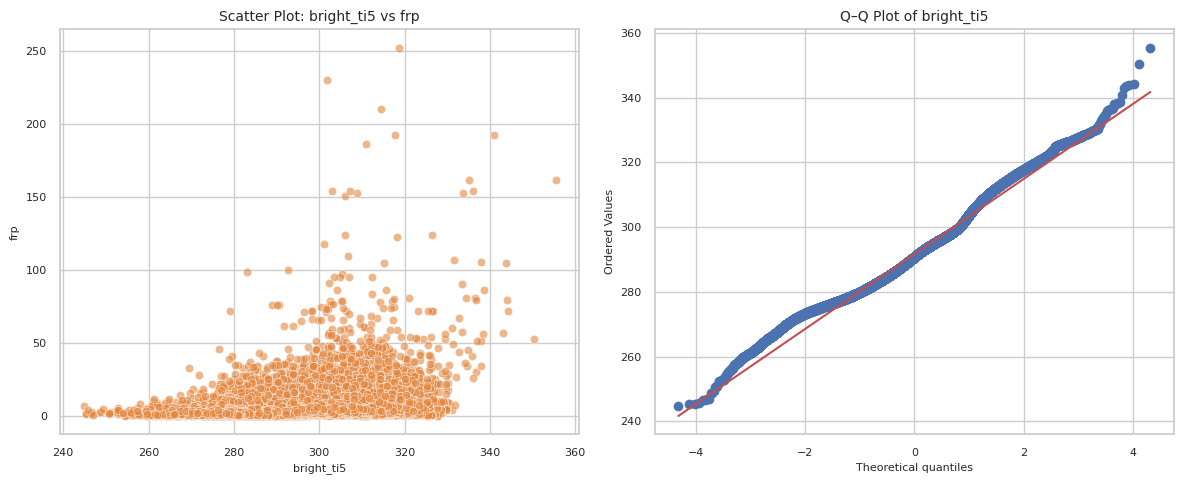

📈 Pearson correlation: 0.319
📊 Spearman correlation: 0.453
------------------------------------------------------------

🌿 Bivariate analysis: scan (numerical) vs track (numerical)
------------------------------------------------------------


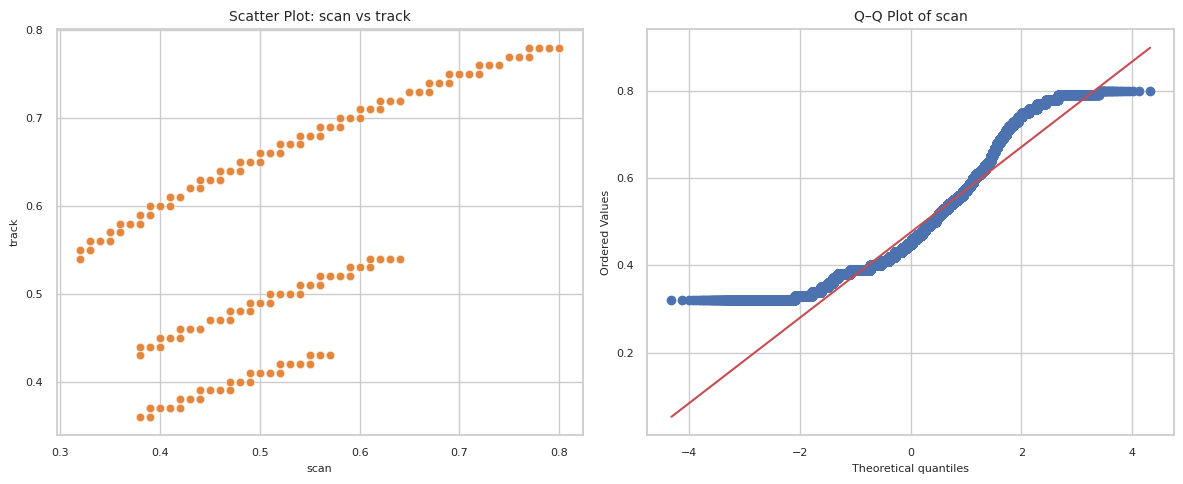

📈 Pearson correlation: 0.575
📊 Spearman correlation: 0.476
------------------------------------------------------------

🌿 Bivariate analysis: scan (numerical) vs frp (numerical)
------------------------------------------------------------


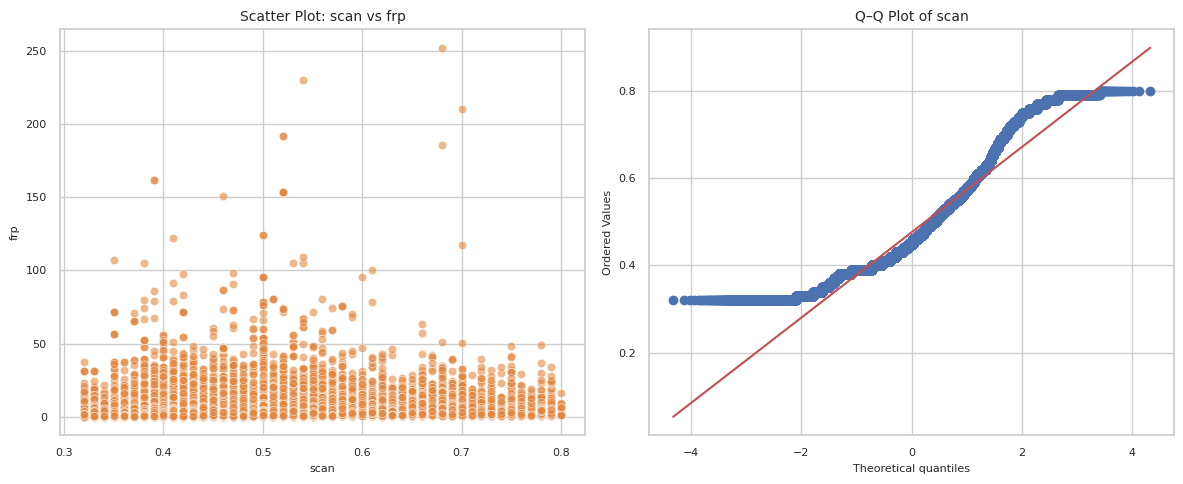

📈 Pearson correlation: 0.102
📊 Spearman correlation: 0.202
------------------------------------------------------------

🌿 Bivariate analysis: track (numerical) vs frp (numerical)
------------------------------------------------------------


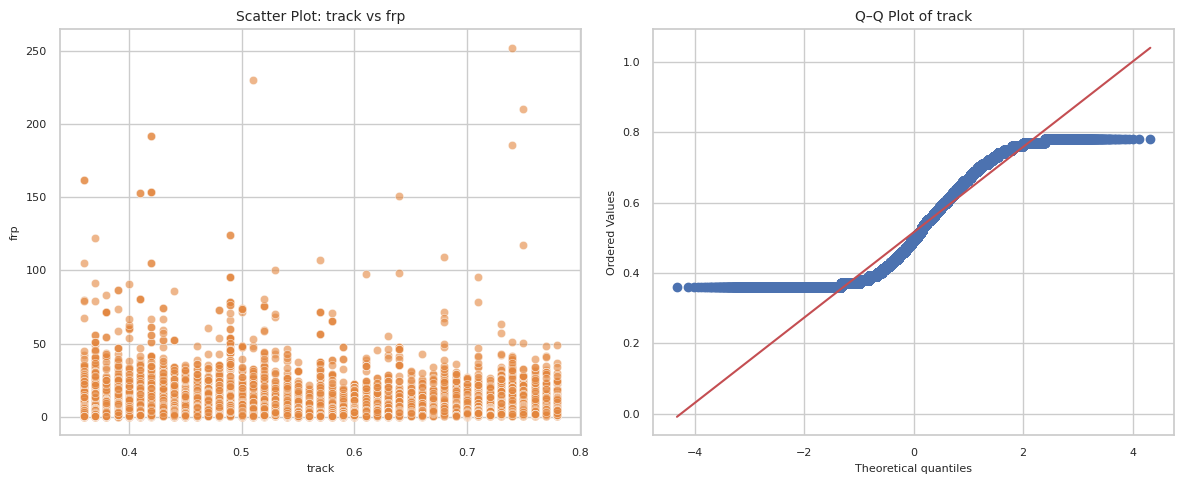

📈 Pearson correlation: 0.047
📊 Spearman correlation: 0.133
------------------------------------------------------------

🌿 Bivariate analysis: confidence (categorical) vs bright_ti4 (numerical)
------------------------------------------------------------


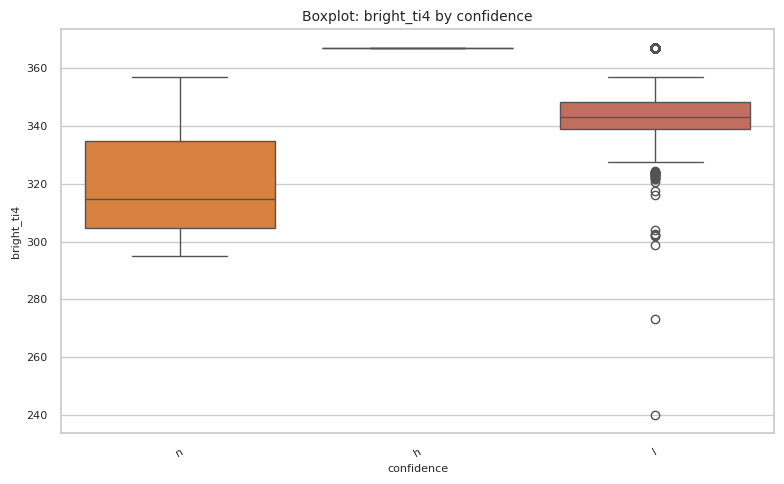

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: confidence (categorical) vs bright_ti5 (numerical)
------------------------------------------------------------


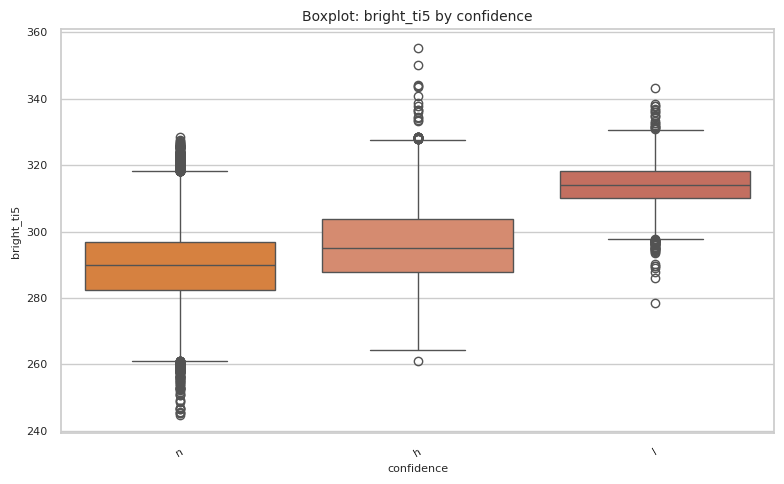

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: confidence (categorical) vs scan (numerical)
------------------------------------------------------------


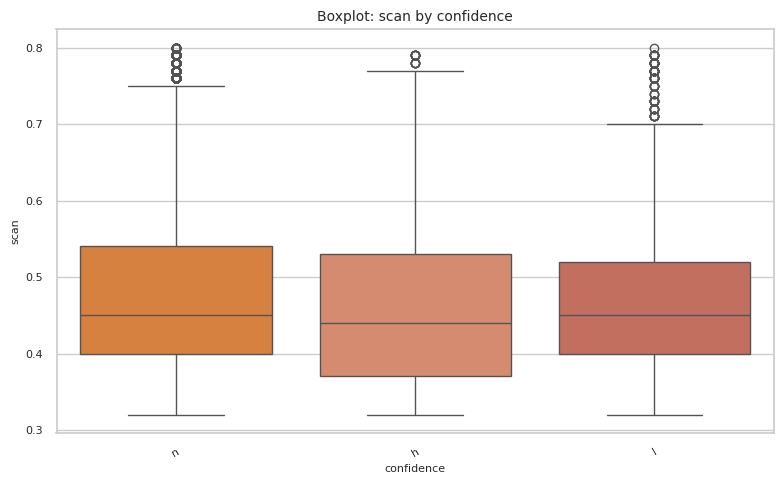

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: confidence (categorical) vs track (numerical)
------------------------------------------------------------


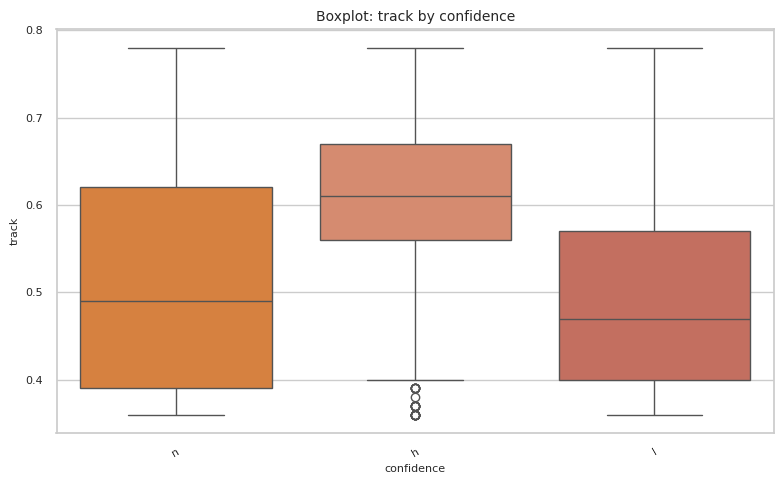

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: confidence (categorical) vs frp (numerical)
------------------------------------------------------------


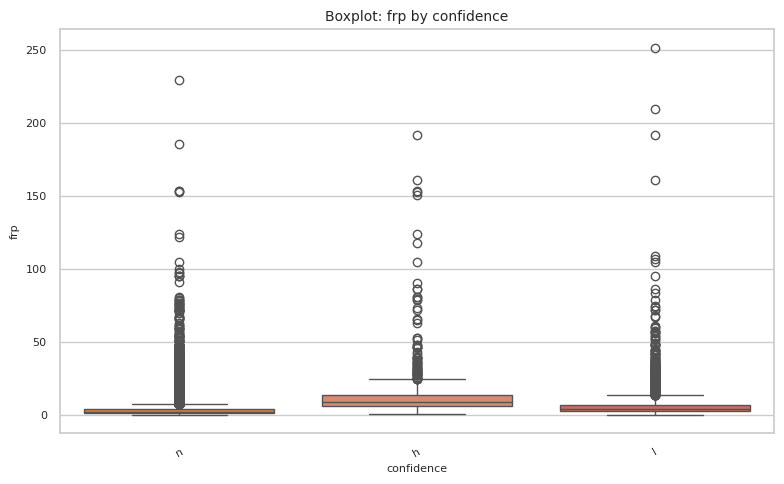

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: type (categorical) vs bright_ti4 (numerical)
------------------------------------------------------------


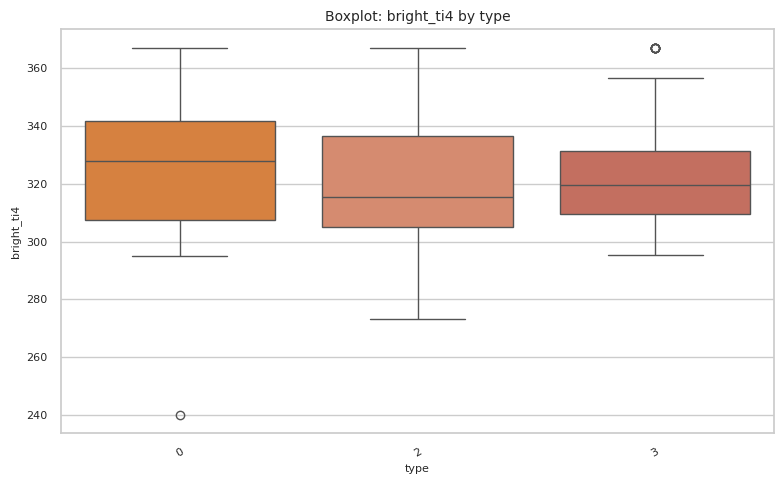

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: type (categorical) vs bright_ti5 (numerical)
------------------------------------------------------------


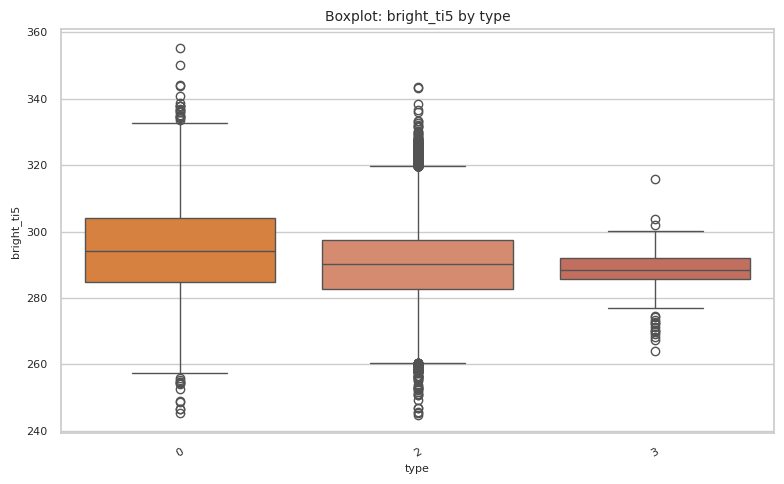

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: type (categorical) vs scan (numerical)
------------------------------------------------------------


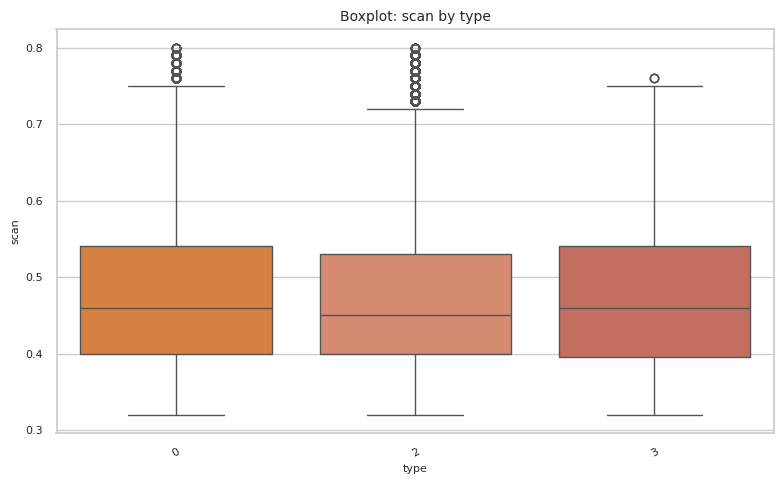

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: type (categorical) vs track (numerical)
------------------------------------------------------------


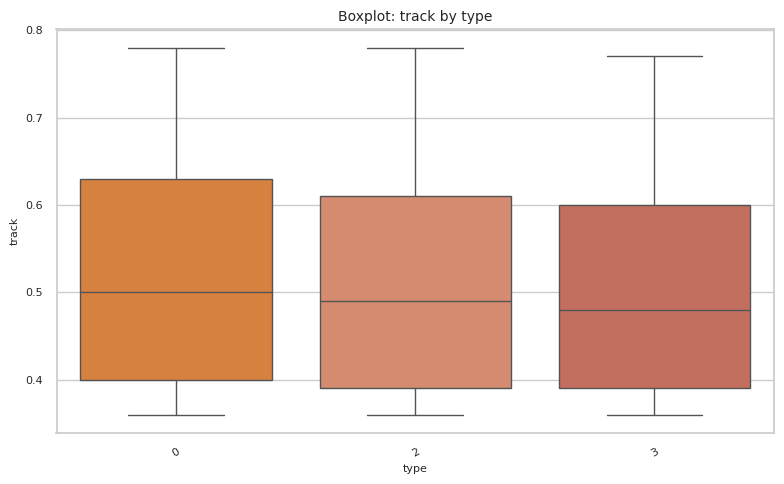

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: type (categorical) vs frp (numerical)
------------------------------------------------------------


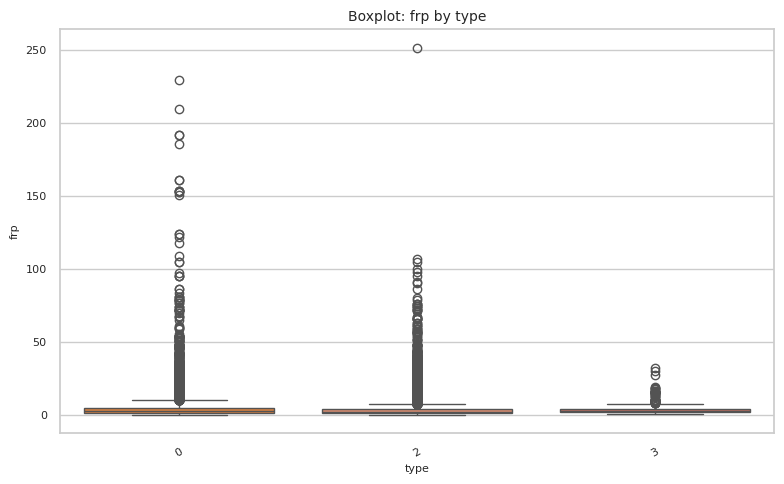

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: daynight (categorical) vs bright_ti4 (numerical)
------------------------------------------------------------


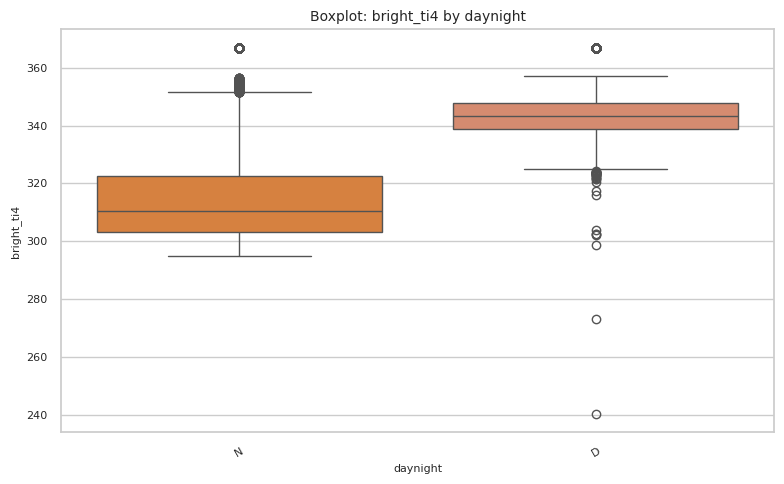

🧪 T-test (N vs D): t = -295.163, p = 0.0000
------------------------------------------------------------

🌿 Bivariate analysis: daynight (categorical) vs bright_ti5 (numerical)
------------------------------------------------------------


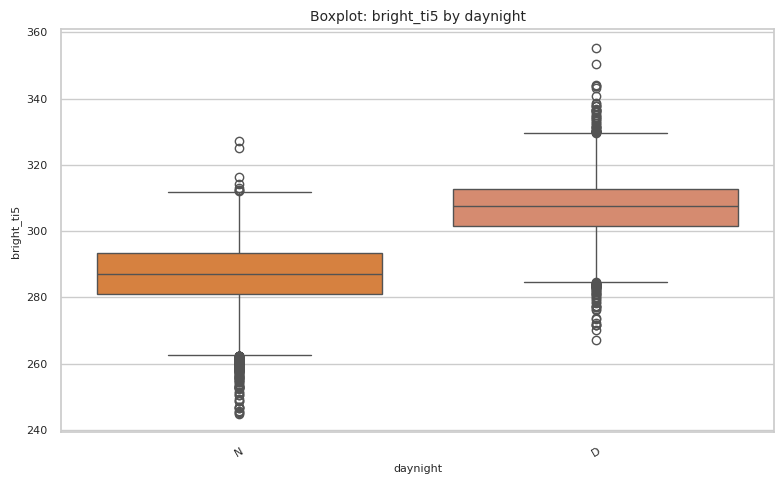

🧪 T-test (N vs D): t = -333.432, p = 0.0000
------------------------------------------------------------

🌿 Bivariate analysis: daynight (categorical) vs scan (numerical)
------------------------------------------------------------


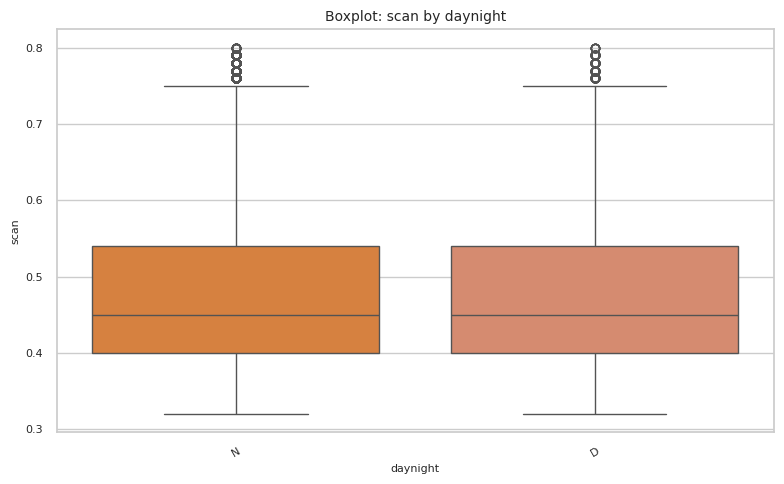

🧪 T-test (N vs D): t = 2.148, p = 0.0317
------------------------------------------------------------

🌿 Bivariate analysis: daynight (categorical) vs track (numerical)
------------------------------------------------------------


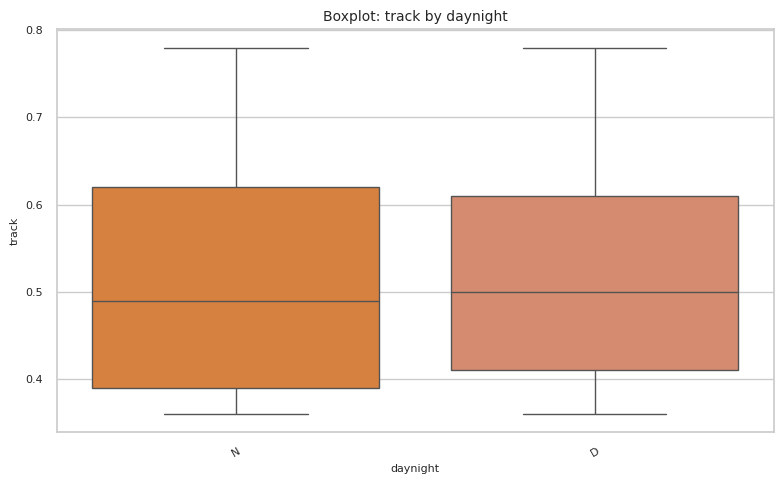

🧪 T-test (N vs D): t = -0.943, p = 0.3456
------------------------------------------------------------

🌿 Bivariate analysis: daynight (categorical) vs frp (numerical)
------------------------------------------------------------


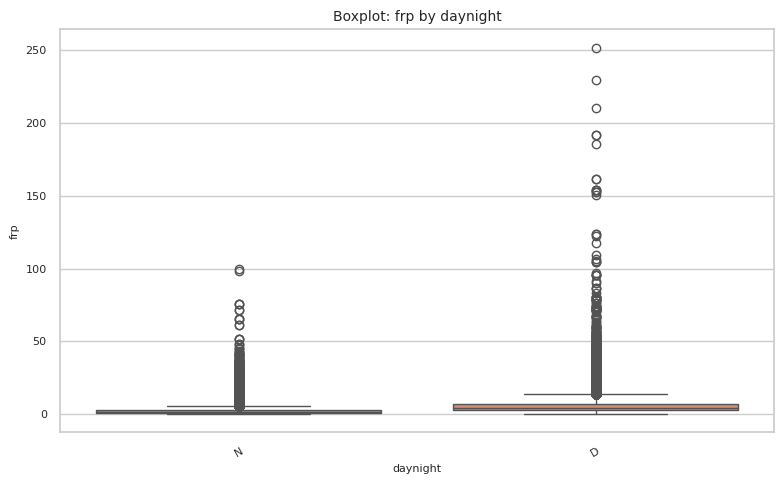

🧪 T-test (N vs D): t = -100.301, p = 0.0000
------------------------------------------------------------


In [37]:

# For categorical vs categorical
for col1, col2 in combinations(cat_cols, 2):
    bivariate_analysis(fire_df, col1, col2, type1="categorical", type2="categorical")

# For numerical vs numerical
for col1, col2 in combinations(num_cols, 2):
    bivariate_analysis(fire_df, col1, col2, type1="numerical", type2="numerical")

# For categorical vs numerical
for cat_col in cat_cols:
    for num_col in num_cols:
        bivariate_analysis(fire_df, cat_col, num_col, type1="categorical", type2="numerical")


## Multivariant Analysis

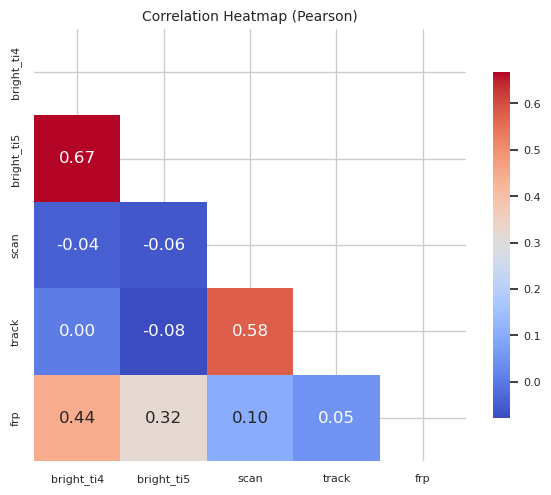

In [43]:
# correlation heatmap for numerical columns with pearson (lower triangle only)
plt.figure(figsize=(6, 5))
corr = fire_df[num_cols].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "fire_pearson_correlation_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()

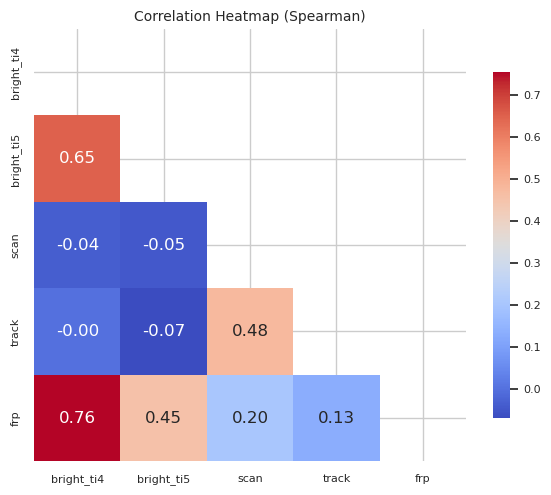

In [44]:
# correlation heatmap for numerical columns with spearman (lower triangle only)
plt.figure(figsize=(6, 5))
corr = fire_df[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (Spearman)")
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "fire_spearman_correlation_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()